**Imports**

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.patches as mpatches

In [3]:
import matplotlib.gridspec as gridspec

In [4]:
import numpy as np

In [5]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = 12

plt.rcParams["font.family"] = "Arial"

**Setup**

In [6]:
colors_dic = {"R1": "tab:orange", "R2": "tab:green", "R3": "tab:blue",
              "R4": "chocolate", "R5": "yellowgreen", "R6": "dodgerblue"}

colors = ["tab:orange", "tab:green", "tab:blue", 
          "chocolate", "yellowgreen", "dodgerblue"]

linestyles = ['-o', '--o', ':o']

**Data**

In [19]:
reactive_abundant = pd.read_csv("../prc_data/evolution_over_seeds_reactive.csv", index_col=0)

self_reactive_abundant = pd.read_csv("../prc_data/evolution_over_seeds_reactive_counting.csv", index_col=0)

In [20]:
dists = []

reactive = []


for type_, variables in zip(['one', 'two', 'three'],
                            [['p_1', 'p_2', 'frequencies'],
                             ['p_1', 'p_2', 'p_3', 'p_4', 'frequencies'],
                             ['p_1', 'p_2', 'p_3', 'p_4', 'p_5', 'p_6', 'p_7', 'p_8', 'frequencies']]):

    groups = reactive_abundant[(reactive_abundant['type'] == type_) & (reactive_abundant['p_1'] > 0.95)].groupby("seed")

    per_seed = []

    for _, group in groups:
        index = group['frequencies'].idxmax()
        per_seed.append(tuple(group[group.index == index][variables].values[0]))

    ps = list(zip(*per_seed))

    reactive.append(ps[:-1])
dists.append(reactive)

In [21]:
counting = []
for type_, variables in zip(['counting-two', 'counting-three'],
                            [['p_1', 'p_2', 'p_4', 'frequencies'],
                             ['p_1', 'p_2', 'p_4', 'p_8', 'frequencies']]):

    groups = self_reactive_abundant[(self_reactive_abundant ['type'] == type_) & (self_reactive_abundant['p_1'] > 0.95)].groupby("seed")

    per_seed = []

    for _, group in groups:
        index = group['frequencies'].idxmax()
        per_seed.append(tuple(group[group.index == index][variables].values[0]))

    ps = list(zip(*per_seed))

    counting.append(ps[:-1])

In [24]:
counting.insert(0, reactive[0])

In [25]:
dists.append(counting)

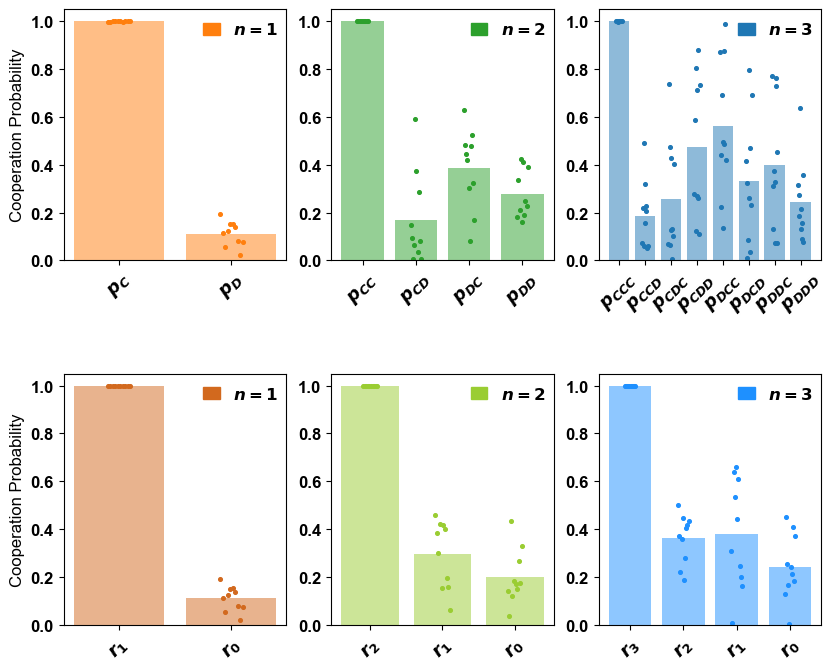

In [28]:
spacing = np.linspace(-.1, .1, 10)

evens = np.arange(1, 17, 1)


fig = plt.figure(figsize=(22, 8))

outer = gridspec.GridSpec(2, 2, wspace=0.25, hspace=0.45)

count = 0

for i, plot in enumerate([0, 2]):
    inner = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer[plot], wspace=0.2, hspace=0.1)

    for j, dist in enumerate(dists[i]):
        averages = np.mean(dist, axis=1)
        ax = plt.Subplot(fig, inner[j])
        
        for l, data in enumerate(dist): 
            for l2, point in enumerate(data):
        
                _ = ax.scatter(0 + evens[l] + spacing[l2], point,
                               color=colors_dic[f"R{j + 1 + (i * 3)}"], s=7, zorder=2);
            _ = ax.bar(evens[l], averages[l],
                      color=colors_dic[f"R{j + 1 + (i * 3)}"], alpha=.5)


        label = [(mpatches.Patch(color=colors_dic[f"R{j + 1 + (i * 3)}"]), f"$n={(j % 3) + 1}$")]

        ax.legend(*zip(*label), bbox_to_anchor=(1.03, 1.01), handlelength=1, fontsize=12, frameon=False)
        
        if (j + (i * 3)) == 0:
            ax.set_ylabel("Cooperation Probability", fontweight='normal')
            
            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$p_C$", "$p_D$"], rotation=45,
                                      fontsize=13)
        if (j + (i * 3)) == 1:

            ax.set_xticks([1, 2, 3, 4])
            ax.set_xticklabels(["$p_{CC}$",
                                        "$p_{CD}$",
                                        "$p_{DC}$",
                                        "$p_{DD}$"], rotation=45,
                                      fontsize=13)
        if (j + (i * 3)) == 2:
            ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
            ax.set_xticklabels(["$p_{CCC}$", 
                                        "$p_{CCD}$", 
                                        "$p_{CDC}$", 
                                        "$p_{CDD}$", 
                                        "$p_{DCC}$", 
                                        "$p_{DCD}$", 
                                        "$p_{DDC}$", 
                                        "$p_{DDD}$"], rotation=45, fontsize=13)
            
        if (j + (i * 3)) == 3:
            ax.set_ylabel("Cooperation Probability", fontweight='normal')
            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$r_1$", "$r_0$"], rotation=45,
                                      fontsize=13)

        if (j + (i * 3)) == 4:
            ax.set_xticks([1, 2, 3])
            ax.set_xticklabels([
                                        "$r_2$",
                                        "$r_1$",
                                        "$r_0$"], rotation=45,
                                      fontsize=13)
        if (j + (i * 3)) == 5:
            ax.set_xticks([1, 2, 3, 4,])
            ax.set_xticklabels(["$r_3$", 
                                        "$r_2$", 
                                        "$r_1$", 
                                        "$r_0$",], rotation=45, fontsize=13)

        fig.add_subplot(ax)

**Right Hand Side**

In [29]:
import numpy as np

In [30]:
reactive_one = pd.read_csv("../prc_data/evolution_over_c_and_beta_reactive_one.csv", index_col=0)

reactive_two = pd.read_csv("../prc_data/evolution_over_c_and_beta_reactive_two.csv", index_col=0)

reactive_three = pd.read_csv("../prc_data/evolution_over_c_and_beta_reactive_three.csv", index_col=0)

In [31]:
reactive_one['type'] = '1'
reactive_two['type'] = '2'
reactive_three['type'] = '3'

In [32]:
beta_one = pd.concat([reactive_one[(reactive_one['beta'] == 1)],
                      reactive_two[(reactive_two['beta'] == 1)],
                      reactive_three[(reactive_three['beta'] == 1)]]
         )

In [33]:
beta_two = pd.concat([reactive_one[(reactive_one['beta'] == 2)],
                      reactive_two[(reactive_two['beta'] == 2)],
                      reactive_three[(reactive_three['beta'] == 2)]]
         )

In [34]:
beta_point = pd.concat([reactive_one[(reactive_one['beta'] == .1)],
                      reactive_two[(reactive_two['beta'] == .1)],
                      reactive_three[(reactive_three['beta'] == .1)]]
         )

In [35]:
reactive_one = reactive_one[(reactive_one['beta'] != 10)]

reactive_two = reactive_two[(reactive_two['beta'] != 10)]

reactive_three = reactive_three[(reactive_three['beta'] != 10)]

In [36]:
reactive_counting_two = pd.read_csv("../prc_data/evolution_over_c_and_beta_reactive_counting_two.csv",
                                      index_col=0)

reactive_counting_three = pd.read_csv("../prc_data/evolution_over_c_and_beta_reactive_counting_three.csv",
                                      index_col=0)

In [37]:
reactive_counting_two['type'] = '2'
reactive_counting_three['type'] = '3'

In [38]:
count_beta_one = pd.concat([reactive_one[(reactive_one['beta'] == 1)],
                            reactive_counting_two[(reactive_counting_two['beta'] == 1)],
                            reactive_counting_three[(reactive_counting_three['beta'] == 1)]]
         )

In [39]:
count_beta_two = pd.concat([reactive_one[(reactive_one['beta'] == 2)],
                            reactive_counting_two[(reactive_counting_two['beta'] == 2)],
                            reactive_counting_three[(reactive_counting_three['beta'] == 2)]]
         )

In [40]:
count_beta_point = pd.concat([reactive_one[(reactive_one['beta'] == .1)],
                            reactive_counting_two[(reactive_counting_two['beta'] == .1)],
                            reactive_counting_three[(reactive_counting_three['beta'] == .1)]]
         )

In [41]:
labels = [r"$\beta$=0.1", r"$\beta$=1", r"$\beta$=2", r"$\beta$=10"]

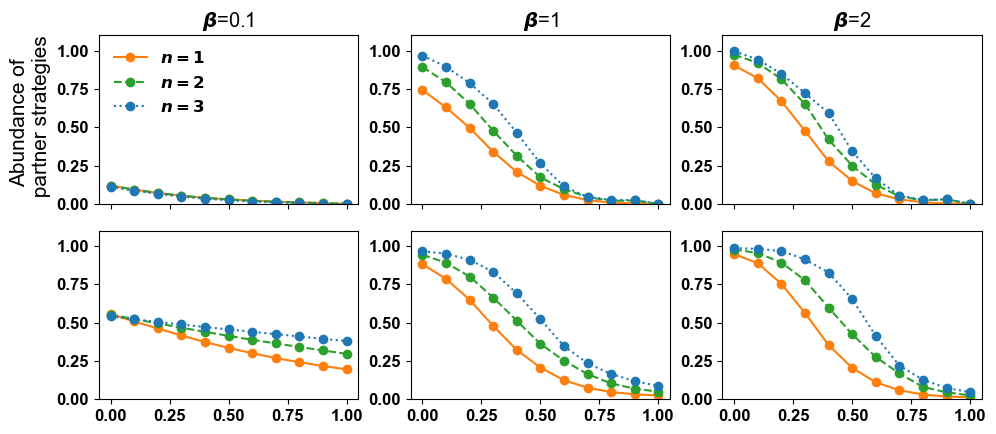

In [43]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 4.5), sharex=True)

for i, df in enumerate([reactive_one, reactive_two, reactive_three]):
    groups_beta = df.groupby("beta")
    
    for j, (beta, group) in enumerate(groups_beta):
        
    
        points = []
        abudance = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            points.append(sum(cost_group['frequencies norm'] * cost_group['cooperation']))
            abudance.append(cost_group[cost_group['isPartner'] == True]['frequencies norm'].sum())


        axes[0, j].plot(np.linspace(0, 1, 11), abudance, linestyles[i], color=colors_dic[f"R{i + 1}"],
                        label=f"$n = {i + 1}$")

        axes[1, j].plot(np.linspace(0, 1, 11), points, linestyles[i], color=colors_dic[f"R{i + 1}"],
                        label=f"$n = {i + 1}$")
            
        
for i in range(3):
    for j in range(2):
        axes[j, i].set_ylim(0, 1.1)
        axes[j, i].set_ylim(0, 1.1)
    
    axes[0, i].set_title(labels[i])

axes[0, 0].legend(fontsize=12, loc=2, frameon=False);

    

for i in [0]:
    axes[i, 0].set_ylabel("Abundance of \n partner strategies", fontweight='normal', fontsize=15);
    
fig.tight_layout()

# fig.savefig("../figures/abundance_of_partner_strategies_one.pdf", bbox_inches='tight')

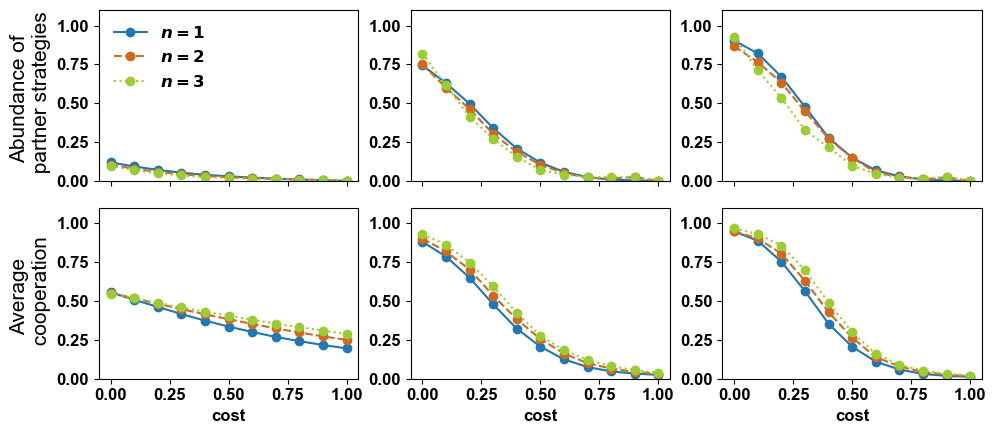

In [44]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(10, 4.5), sharex=True)
            
            
for i, df in enumerate([reactive_one, reactive_counting_two, reactive_counting_three]):
    groups_beta = df.groupby("beta")
    
    for j, (beta, group) in enumerate(groups_beta):
        
        if beta != 10:
    
            points = []
            abudance = []
            group = group.sort_values("c")
            cost_groups = group.groupby("c")

            for _, cost_group in cost_groups:
                points.append(sum(cost_group['frequencies norm'] * cost_group['cooperation']))
                abudance.append(cost_group[cost_group['isPartner'] == True]['frequencies norm'].sum())


            axes[0, j].plot(np.linspace(0, 1, 11), abudance, linestyles[i], color=colors_dic[f"R{i + 3}"],
                           label=f"$n = {i + 1}$")

            axes[1, j].plot(np.linspace(0, 1, 11), points, linestyles[i], color=colors_dic[f"R{i + 3}"],
                           label=f"$n = {i + 1}$")
            
        
for i in range(3):
    for j in range(2):
        axes[j, i].set_ylim(0, 1.1)
        axes[j, i].set_ylim(0, 1.1)

    axes[1, i].set_xlabel("cost")

axes[0, 0].legend(fontsize=12, loc=2, frameon=False);

for i in [1]:
    axes[i, 0].set_ylabel("Average \n cooperation", fontweight='normal', fontsize=15);

for i in [0]:
    axes[i, 0].set_ylabel("Abundance of \n partner strategies", fontweight='normal', fontsize=15);
    
fig.tight_layout()

# fig.savefig("../figures/abundance_of_partner_strategies_two.pdf", bbox_inches='tight')

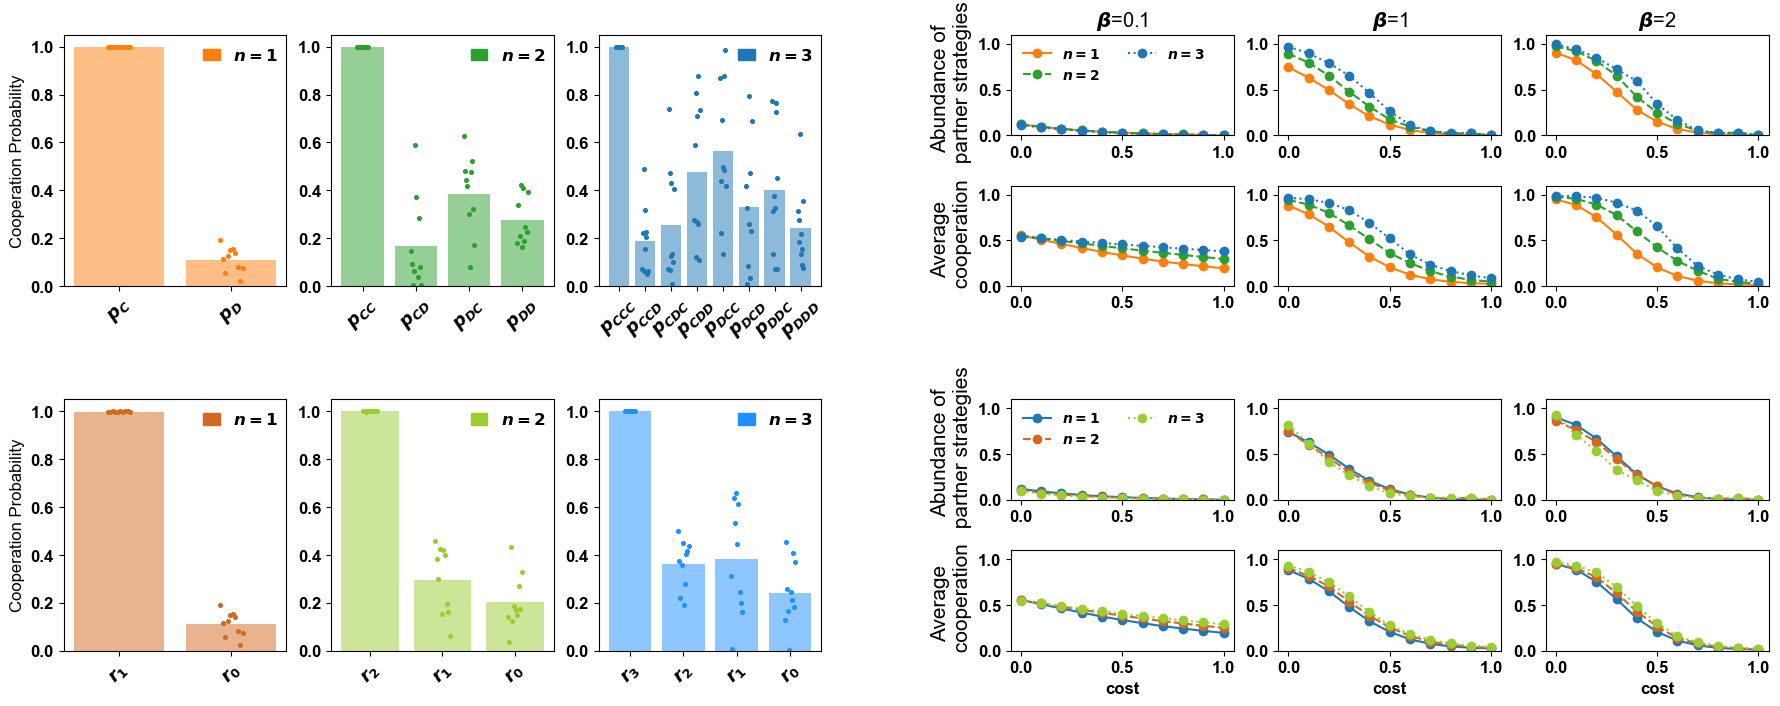

In [53]:
spacing = np.linspace(-.1, .1, 10)

evens = np.arange(1, 17, 1)


fig = plt.figure(figsize=(22, 8))

outer = gridspec.GridSpec(2, 2, wspace=0.25, hspace=0.45)

count = 0

for i, plot in enumerate([0, 2]):
    inner = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=outer[plot], wspace=0.2, hspace=0.1)

    for j, dist in enumerate(dists[i]):
        averages = np.mean(dist, axis=1)
        ax = plt.Subplot(fig, inner[j])
        
        for l, data in enumerate(dist): 
            for l2, point in enumerate(data):
        
                _ = ax.scatter(0 + evens[l] + spacing[l2], point,
                               color=colors_dic[f"R{j + 1 + (i * 3)}"], s=7, zorder=2);
            _ = ax.bar(evens[l], averages[l],
                      color=colors_dic[f"R{j + 1 + (i * 3)}"], alpha=.5)


        label = [(mpatches.Patch(color=colors_dic[f"R{j + 1 + (i * 3)}"]), f"$n={(j % 3) + 1}$")]

        ax.legend(*zip(*label), bbox_to_anchor=(1.03, 1.01), handlelength=1, fontsize=12, frameon=False)
        
        if (j + (i * 3)) == 0:
            ax.set_ylabel("Cooperation Probability", fontweight='normal')
            
            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$p_C$", "$p_D$"], rotation=45,
                                      fontsize=13)
        if (j + (i * 3)) == 1:

            ax.set_xticks([1, 2, 3, 4])
            ax.set_xticklabels(["$p_{CC}$",
                                        "$p_{CD}$",
                                        "$p_{DC}$",
                                        "$p_{DD}$"], rotation=45,
                                      fontsize=13)
        if (j + (i * 3)) == 2:
            ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8])
            ax.set_xticklabels(["$p_{CCC}$", 
                                        "$p_{CCD}$", 
                                        "$p_{CDC}$", 
                                        "$p_{CDD}$", 
                                        "$p_{DCC}$", 
                                        "$p_{DCD}$", 
                                        "$p_{DDC}$", 
                                        "$p_{DDD}$"], rotation=45, fontsize=13)
            
        if (j + (i * 3)) == 3:
            ax.set_ylabel("Cooperation Probability", fontweight='normal')
            ax.set_xticks([1, 2])
            ax.set_xticklabels(["$r_1$", "$r_0$"], rotation=45,
                                      fontsize=13)

        if (j + (i * 3)) == 4:
            ax.set_xticks([1, 2, 3])
            ax.set_xticklabels([
                                        "$r_2$",
                                        "$r_1$",
                                        "$r_0$"], rotation=45,
                                      fontsize=13)
        if (j + (i * 3)) == 5:
            ax.set_xticks([1, 2, 3, 4,])
            ax.set_xticklabels(["$r_3$", 
                                        "$r_2$", 
                                        "$r_1$", 
                                        "$r_0$",], rotation=45, fontsize=13)

        fig.add_subplot(ax)
        
inner = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=outer[1], wspace=0.2, hspace=0.5)

for i, df in enumerate([beta_point, beta_one, beta_two]):
    df.sort_values(by='type')
    groups_type = df.groupby("type")
    
    ax = plt.Subplot(fig, inner[0, i])
    if i == 0:
        ax.set_ylabel("Abundance of \n partner strategies", fontweight='normal', fontsize=15);
    for j, (type_, group) in enumerate(groups_type):
        abudance = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            abudance.append(cost_group[cost_group['isPartner'] == True]['frequencies norm'].sum())
        
        ax.plot(np.linspace(0, 1, 11), abudance, linestyles[j], color=colors_dic[f"R{j + 1}"],
                label=f"$n = {j + 1}$")
        ax.set_ylim(0, 1.1)
    if i == 0:
        ax.legend(fontsize=10, loc=2, ncols=2, frameon=False)
    ax.set_title(labels[i])
    fig.add_subplot(ax)
    
    
    ax = plt.Subplot(fig, inner[1, i])
    if i == 0:
        ax.set_ylabel("Average \n cooperation", fontweight='normal', fontsize=15);
    for j, (type_, group) in enumerate(groups_type):
        points = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            points.append(sum(cost_group['frequencies norm'] * cost_group['cooperation']))
            abudance.append(cost_group[cost_group['isPartner'] == True]['frequencies norm'].sum())
        
        ax.plot(np.linspace(0, 1, 11), points, linestyles[j], color=colors_dic[f"R{j + 1}"],
                label=f"$n = {j + 1}$")
        ax.set_ylim(0, 1.1)

    fig.add_subplot(ax)
    
    
inner = gridspec.GridSpecFromSubplotSpec(2, 3, subplot_spec=outer[3], wspace=0.2, hspace=0.5)

for i, df in enumerate([count_beta_point, count_beta_one, count_beta_two]):
    df.sort_values(by='type')
    groups_type = df.groupby("type")
    
    ax = plt.Subplot(fig, inner[0, i])
    if i == 0:
        ax.set_ylabel("Abundance of \n partner strategies", fontweight='normal', fontsize=15);
    for j, (type_, group) in enumerate(groups_type):
        abudance = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            abudance.append(cost_group[cost_group['isPartner'] == True]['frequencies norm'].sum())
        
        ax.plot(np.linspace(0, 1, 11), abudance, linestyles[j], color=colors_dic[f"R{2 + j + 1}"],
                label=f"$n = {j + 1}$")
        ax.set_ylim(0, 1.1)
    if i == 0:
        ax.legend(fontsize=10, loc=2, frameon=False, ncols=2)
    fig.add_subplot(ax)
    
    
    ax = plt.Subplot(fig, inner[1, i])
    if i == 0:
        ax.set_ylabel("Average \n cooperation", fontweight='normal', fontsize=15);
    for j, (type_, group) in enumerate(groups_type):
        points = []
        group = group.sort_values("c")
        cost_groups = group.groupby("c")

        for _, cost_group in cost_groups:
            points.append(sum(cost_group['frequencies norm'] * cost_group['cooperation']))
            abudance.append(cost_group[cost_group['isPartner'] == True]['frequencies norm'].sum())
        
        ax.plot(np.linspace(0, 1, 11), points, linestyles[j], color=colors_dic[f"R{2 + j + 1}"],
                label=f"$n = {j + 1}$")
        ax.set_ylim(0, 1.1)
    ax.set_xlabel("cost")
    fig.add_subplot(ax)

fig.savefig("../figures/abundant_strategies.pdf", bbox_inches='tight')